## Setting Up Pandas

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import numpy as np
import pandas as pd
from pandas import DataFrame, Series, scatter_matrix
%matplotlib inline
import seaborn as sn
from matplotlib.ticker import FormatStrFormatter

In [2]:
basic_demo = pd.read_csv('data/atussum_2014.dat')
activity = pd.read_csv('data/atuscps_2014.dat')

## Quest

How does the average American spend time for their job? 
 - Who is represented in this study?
 - How many hours per education level are worked?
 - Which industries by education level are represented?

## Plots

### Age Across Board

The total number of respondants is 11592. Below is the breakdown of said respondants.

Total number of respondants =  11592


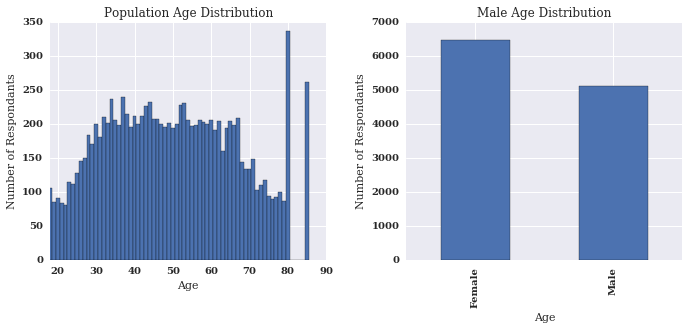

In [6]:

#renaming 1's & 0's.
basic_demo['sex_title'] = basic_demo.TESEX.apply(lambda x:'Male' if x == 1 else 'Female')

with plt.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 20}):
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('Age')
    ax1.set_xlim(18, 90)
    ax1.set_ylabel('Number of Respondants')
    ax1.set_title('Population Age Distribution')
    basic_demo['TEAGE'].hist(bins=[x-.5 for x in range(87)])
    ax2 = fig.add_subplot(122)
    ax2.set_xlabel('Age')
    ax2.set_ylabel('Number of Respondants')
    ax2.set_title("Male Age Distribution")
#     ax2.set_ylim(0, 250)
#     ax2.set_xlim(18, 90)
    (basic_demo.sex_title).value_counts().plot(kind='bar')
    plt.tight_layout()
    plt.savefig("normalvars.png", dpi=250)
    print("Total number of respondants = ", len(basic_demo))
plt.show()

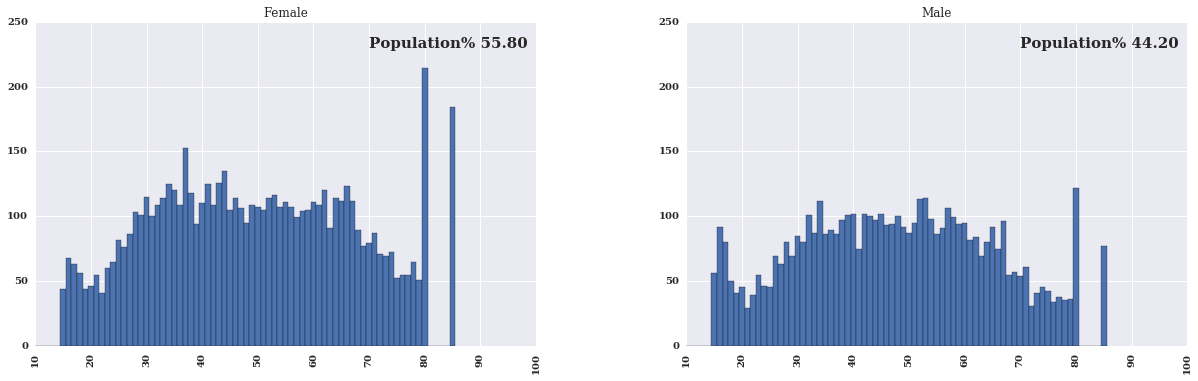

In [7]:
with plt.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 15}):
    ax1 = basic_demo['TEAGE'].hist(by=basic_demo.sex_title ,bins=[x-.5 for x in range(87)], figsize=(20,6))
    for i, row in enumerate(range(len(ax1))):
        ax1[i].set_xlim(10, 100)
        ax1[i].set_ylim(0, 250)
        num = (male_female[i]/11592)*100
        temp_str = "Population% {:.{prec}f}".format(num, prec=2)
        ax1[i].text(70,230, temp_str)

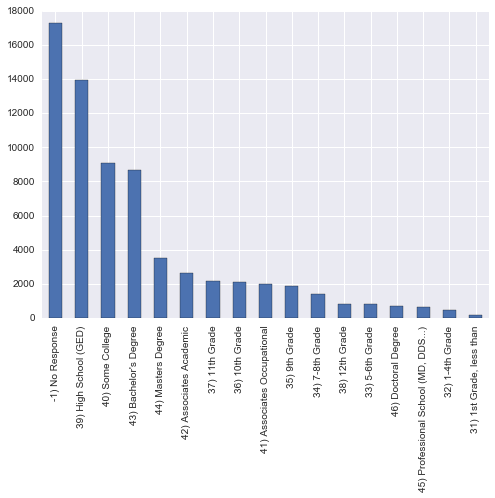

In [8]:
#Renaming a new list
activity['education_name'] = activity.PEEDUCA.apply(lambda x: grade_level[x])
#Plotting Education 
ax = activity['education_name'].value_counts().plot('bar')
plt.show()


## How many hours did the educated group work at main job the previous week?

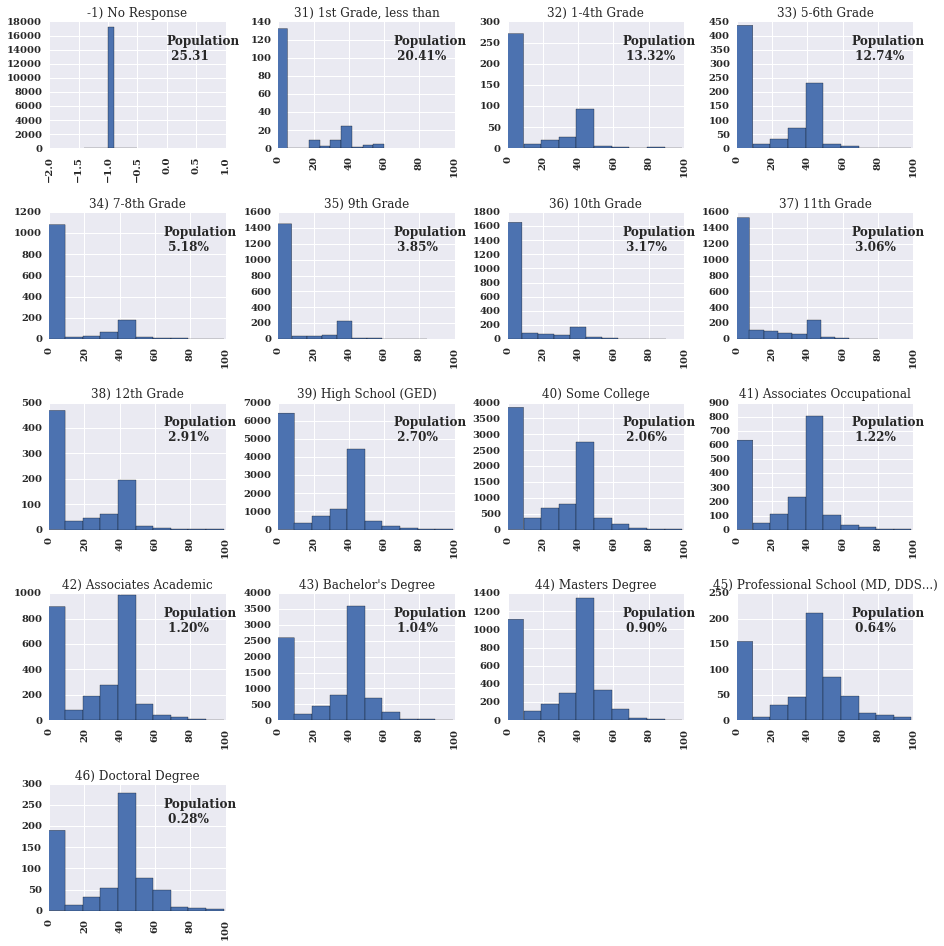

In [12]:
with plt.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 12}):
    ax = activity.PEHRACT1.hist(by=activity.education_name, layout=(6,4), figsize=(15,20))
    iterator = 0
    for i, row in enumerate(range(len(ax))):    
        for j, column in enumerate(range(len(ax[i]))):
            if ax[i][j].get_title() == '-1) No Response':
                ax[i][j].set_xlim(-2,1)
                temp_y = ax[i][j].get_ylim()[1]
                temp_x = ax[i][j].get_xlim()[1]
                temp_y = temp_y - (temp_y*.3)
                temp_x = temp_x - (temp_x*1)
                temp_str = "Population\n {}".format(edu_percentage[iterator])
                ax[i][j].text(temp_x, temp_y, temp_str)
                iterator += 1
            else:
                if iterator < len(edu_percentage):
                    temp_str = "Population\n {}%".format(edu_percentage[iterator])
                    iterator += 1
                ax[i][j].set_xlim(0,100)
                temp_y = ax[i][j].get_ylim()[1]
                temp_x = ax[i][j].get_xlim()[1]
                temp_y = temp_y - (temp_y*.3)
                temp_x = temp_x - (temp_x*.35)
                ax[i][j].text(temp_x, temp_y, temp_str)

plt.show()

## Industry

['32) 1-4th Grade', '33) 5-6th Grade', '34) 7-8th Grade', '35) 9th Grade', '36) 10th Grade', '37) 11th Grade', '38) 12th Grade', '39) High School (GED)', '40) Some College', '41) Associates Occupational', '42) Associates Academic', "43) Bachelor's Degree", '44) Masters Degree', '45) Professional School (MD, DDS...)', '46) Doctoral Degree', '-1) No Response', '31) 1st Grade, less than']


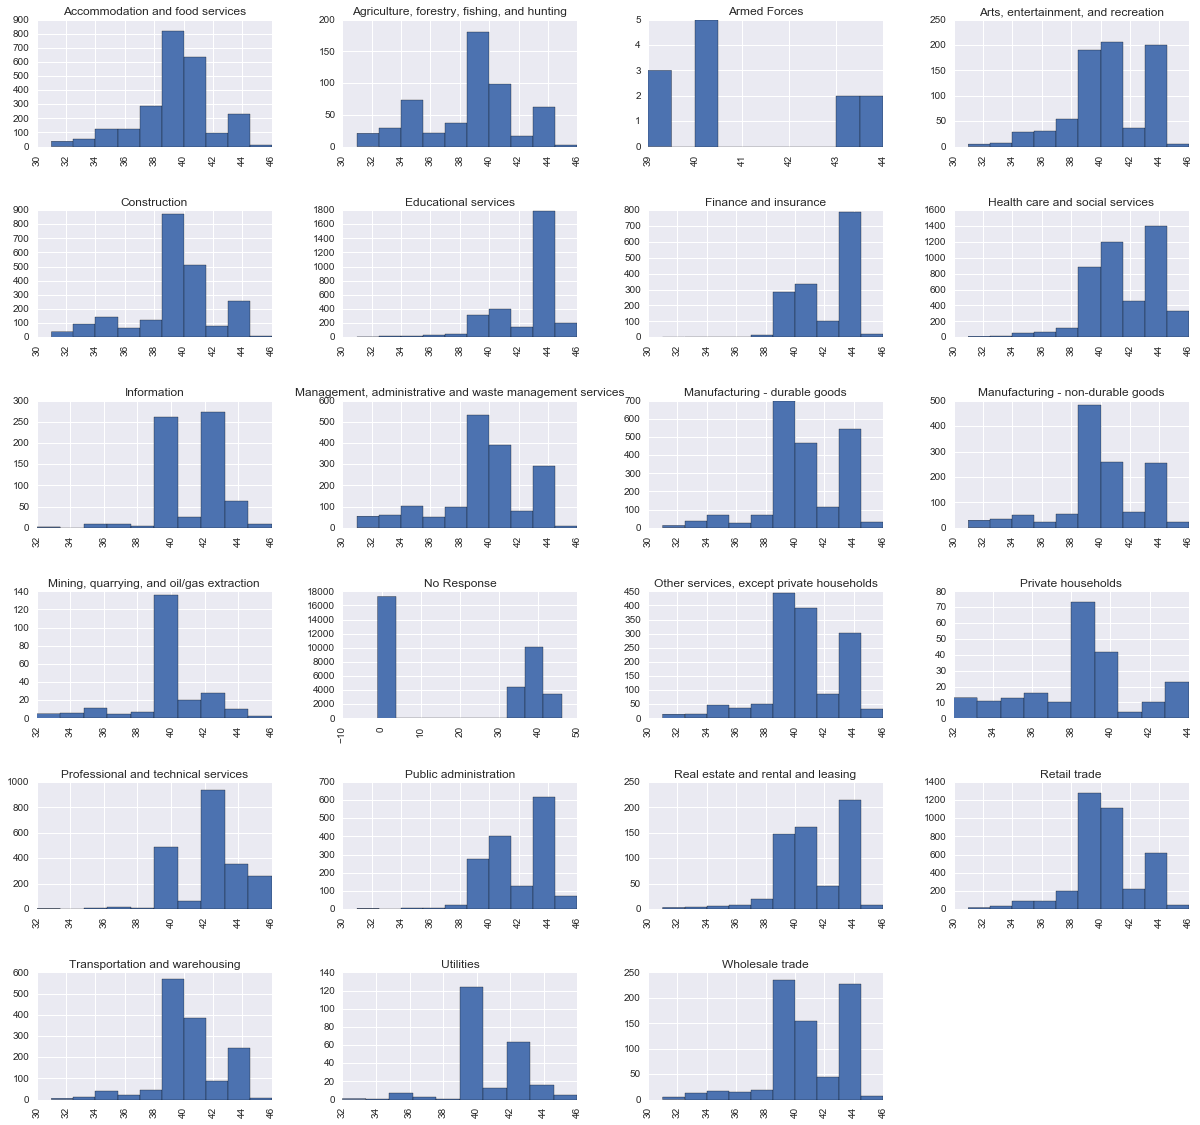

In [49]:
#activity['worker_class'] = activity.PEIO1COW.apply(lambda x: worker_class[x])
activity['industry'] = activity.PRIMIND1.apply(lambda x: industry_list[x])
temp_list = list(grade_level.values())
print(temp_list)
ax = activity.PEEDUCA.hist(by=activity.industry, layout=(6,4), figsize=(20,20))
plt.show()



## Number of Jobs by Education

-1 did not answer, 1 = 1 job, 2 = 2 or more


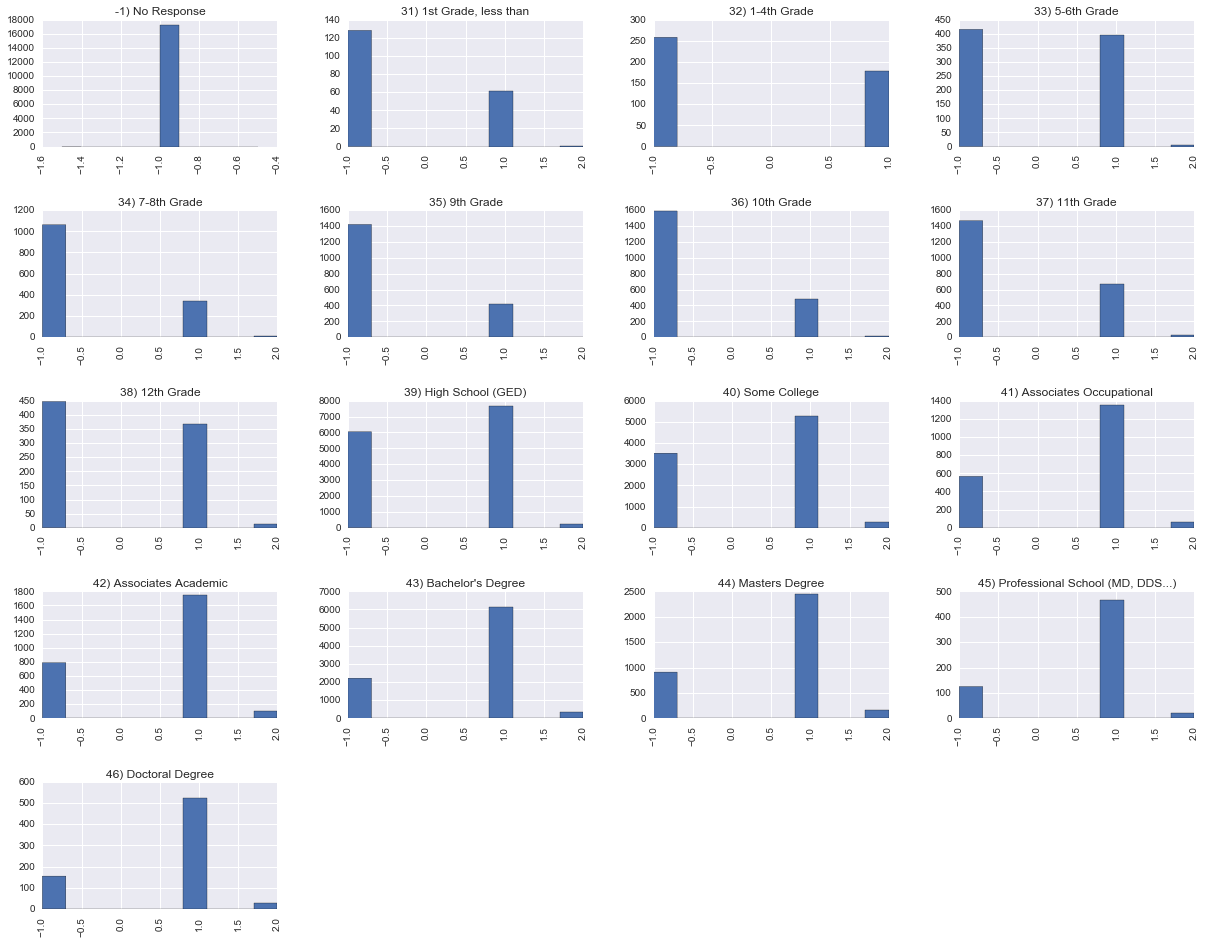

In [62]:
print("-1 did not answer, 1 = 1 job, 2 = 2 or more")
activity.PRSJMJ.hist(by=activity.education_name,layout=(6,4), figsize=(20,20))
plt.show()


## How do people spend their time by education?

In [ ]:
temp_list = [col for col in basic_demo if 't' in col] 
basic_demo.plot(kind='bar', by=leisure_time)
plt.show()

## Lists

In [ ]:
races = ['White only',' Black only',' American Indian, Alaskan Native only',
         ' Asian only',' Hawaiian/Pacific Islander only',' White-Black',
         ' White-American Indian',' White-Asian',' White-Hawaiian',
         ' Black-American Indian',' Black-Asian',' Black-Hawaiian',
         ' American Indian-Asian',' American Indian-Hawaiian',' Asian-Hawaiian',
         ' White-Black-American Indian',' White-Black-Asian',' White-Black-Hawaiian',
         ' White-American Indian-Asian',' White-American Indian-Hawaiian',
         ' White-Asian-Hawaiian',' Black-American Indian-Asian',
         ' White-Black-American Indian-Asian',' White-American Indian-Asian-Hawaiian',
         ' Other 3 race combinations',' Other 4 and 5 race combinations']

grade_level = {-1:'-1) No Response', 31: '31) 1st Grade, less than', 32:'32) 1-4th Grade', 33:'33) 5-6th Grade', 34: '34) 7-8th Grade', 
            35: '35) 9th Grade', 36:'36) 10th Grade', 37:'37) 11th Grade', 38:'38) 12th Grade', 
               39:'39) High School (GED)', 40:'40) Some College', 41:'41) Associates Occupational', 
               42:'42) Associates Academic', 43:'43) Bachelor\'s Degree', 44:'44) Masters Degree', 
               45:'45) Professional School (MD, DDS...)', 46:'46) Doctoral Degree'}



male_female = [6468, 5124]

# Manages the stats for population of degrees
edu_count_list = activity.education_name.value_counts()
sum_edu = sum(edu_count_list)
edu_percentage = []
for i in edu_count_list:
    temp_num = (i/sum_edu)*100
    temp_string = "{:.{prec}f}".format(temp_num, prec=2)
    edu_percentage.append(temp_string)
    
# Worker Class type dictionary
worker_class = {-1:'No Response', 1:'Federal Gov\'t', 2: 'State Gov\'t', 3:'Local Gov\'t', 4:'Profit Private', 
                5:'Nonprofit Private', 6: 'Self-employed, INC', 7:'Self-employed, Un-Inc', 8:'Without pay'}

leisure_time = [120101, 40106, 30106, 70103, 140102]

# Main Industry
industry_list = {-1: 'No Response', 1: 'Agriculture, forestry, fishing, and hunting', 2: 'Mining, quarrying, and oil/gas extraction', 
            3:'Construction', 4: 'Manufacturing - durable goods', 5:'Manufacturing - non-durable goods', 6 :'Wholesale trade',
            7: 'Retail trade', 8: 'Transportation and warehousing', 9: 'Utilities', 10: 'Information', 11: 'Finance and insurance',
            12: 'Real estate and rental and leasing', 13: 'Professional and technical services', 
            14: 'Management, administrative and waste management services', 15: 'Educational services', 
            16: 'Health care and social services', 17: 'Arts, entertainment, and recreation', 
            18: 'Accommodation and food services', 19: 'Private households',
            20: 'Other services, except private households', 21: 'Public administration', 22: 'Armed Forces'}

## Functions

In [4]:
def labels_multi_plots(list_titles, data_series, by_field=None):
    ax = data_series.hist(by=by_field, figsize=(20,10))
    for i, row in enumerate(range(len(ax))):
        for j, column in enumerate(range(len(ax[i]))):
            list_index = (ax[i][j].get_title())
            if list_index!='':
                list_index = int(list_index)
                list_title = races[list_index-1]
                ax[i][j].set_title(list_title)
                ax[i][j].title.set_position([.5,1.10])
                
            else:
                pass

In [3]:
def set_custom_ranges(ax, x_tuple, y_tuple):
    for i, row in enumerate(range(len(ax))):
            for j, column in enumerate(range(len(ax[i]))):
                if ax[i][j].get_title() == '-1) No Response':
                    ax[i][j].set_xlim(x_tuple)
                else:
                    ax[i][j].set_xlim(y_tuple)